# Identification and classification of the food image

The following code is used to correctly identify the class of the food item to which it belongs to.
I have downloaded and extracted the dataset Food 101, and tried to understand it. It contains 101 classes for food images.

In [1]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
from keras_adabound import AdaBound

/Users/fornow/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/fornow/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/fornow/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/fornow/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

This network was built using Tensorflow and Keras. Here various libraries are being imported.

In [4]:
!ls food-101/

README.txt            images                meta
Untitled.ipynb        license_agreement.txt


Elements in the downloaded dataset.

In [5]:
os.listdir('food-101/images')

['foie_gras',
 'club_sandwich',
 'cheese_plate',
 'cup_cakes',
 'garlic_bread',
 'gnocchi',
 'ice_cream',
 'samosa',
 'donuts',
 'tuna_tartare',
 'filet_mignon',
 '.DS_Store',
 'seaweed_salad',
 'french_toast',
 'chicken_curry',
 'shrimp_and_grits',
 'steak',
 'cheesecake',
 'red_velvet_cake',
 'waffles',
 'churros',
 'gyoza',
 'lobster_roll_sandwich',
 'huevos_rancheros',
 'breakfast_burrito',
 'grilled_cheese_sandwich',
 'spaghetti_bolognese',
 'falafel',
 'poutine',
 'greek_salad',
 'beef_tartare',
 'fried_calamari',
 'guacamole',
 'ravioli',
 'lobster_bisque',
 'beet_salad',
 'risotto',
 'crab_cakes',
 'strawberry_shortcake',
 'edamame',
 'ceviche',
 'hot_and_sour_soup',
 'spring_rolls',
 'sashimi',
 'paella',
 'clam_chowder',
 'miso_soup',
 'escargots',
 'hot_dog',
 'pulled_pork_sandwich',
 'bruschetta',
 'panna_cotta',
 'fish_and_chips',
 'pad_thai',
 'tiramisu',
 'takoyaki',
 'macarons',
 'apple_pie',
 'cannoli',
 'scallops',
 'frozen_yogurt',
 'chicken_quesadilla',
 'mussels',


This is a list of 101 classes in which all the food items are classified.

In [2]:
os.listdir('food-101/meta')

['classes.txt',
 'train.txt',
 'test.json',
 'labels.txt',
 'train.json',
 'test.txt']

The following folder contains the annotation files for the test and training images in json format.
meta folder contains the text files - train.txt and test.txt
train.txt contains the list of images that belong to training set
test.txt contains the list of images that belong to test set
classes.txt contains the list of all classes of food

In [3]:
!head food-101/meta/train.txt


apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [4]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


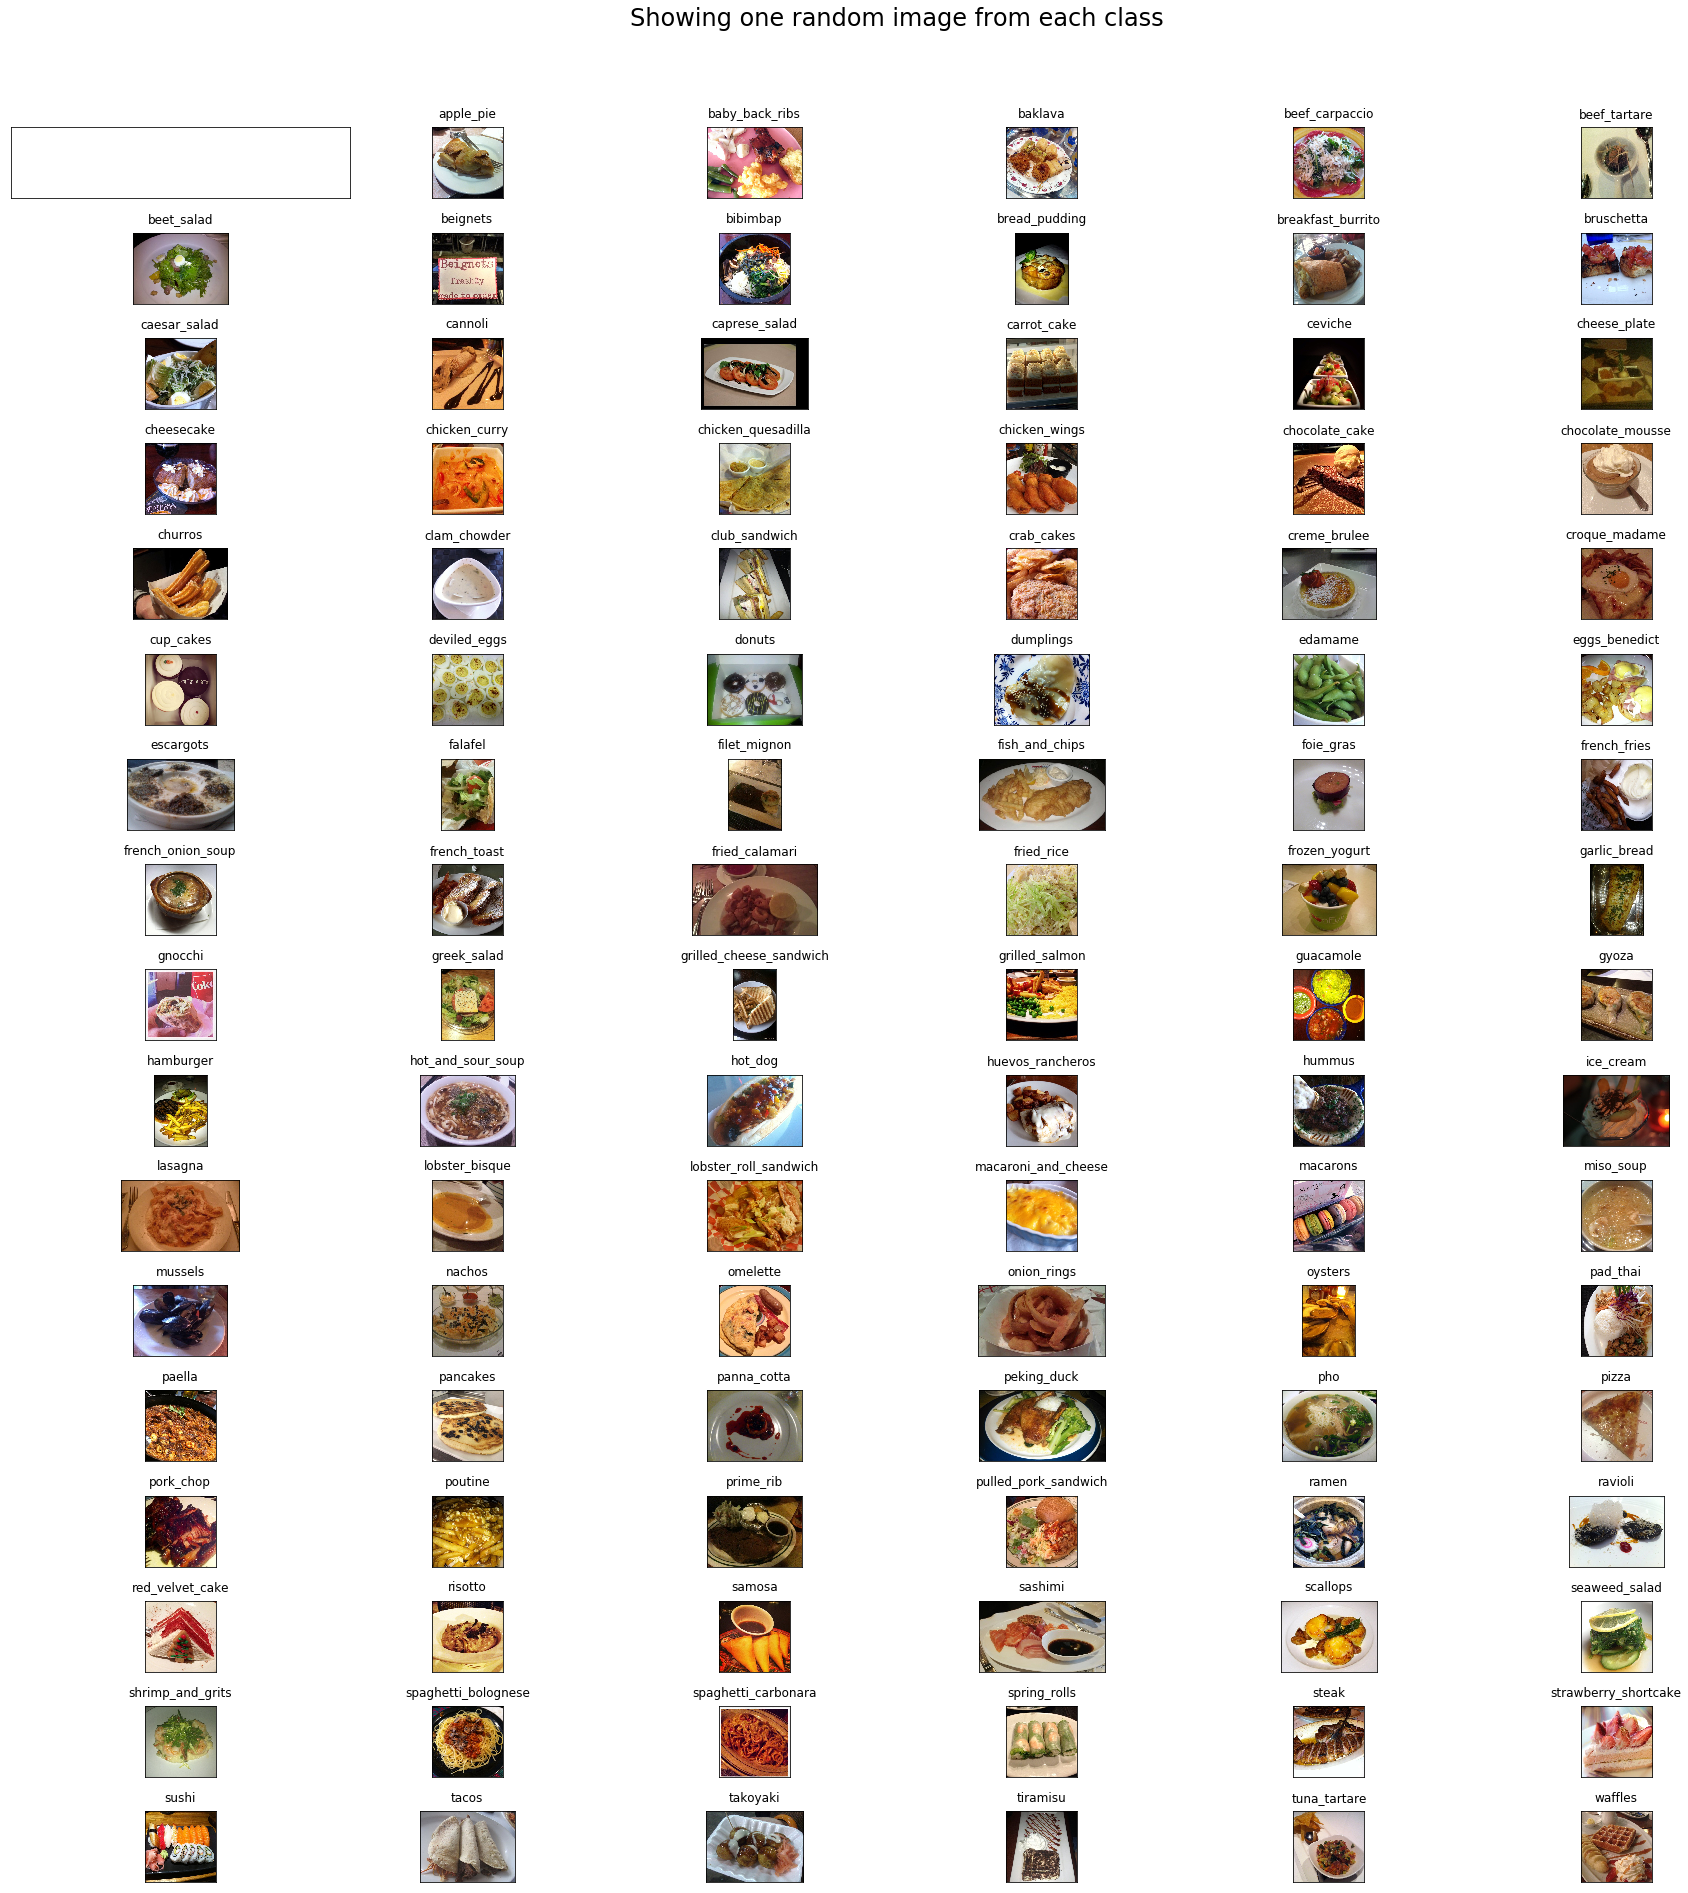

In [5]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

Here I am trying to display any one random image from each class, so that we have an idea of the classes. There are 17 rows and 6 columns i.e. 102 grid spaces and the first one is kept empty. Hence all classes with one random image from it is displayed above.

In [12]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

Here, sir I am trying to spilt my dataset into train and test folders according to the annotation files that was stated earlier.

In [9]:
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In the above snippet, training images are being coppied from the images folder into a train folder using train.txt

In [10]:
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In the above snippet, testing images are being coppied from the images folder into a test folder using test.txt

In [ ]:
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

It checks the number of images in the train folder
Total number of samples in train folder
75750

In [ ]:
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

It checks the number of images in the test folder
Total number of samples in test folder
25250

In [6]:
del foods_sorted[0]

I am sorting all 101 classes alphabetically.

In [7]:
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

These are all 101 classes sorted alhpabetically.

Now I create a subset if data with few classes (3) i.e. train_mini and test_mini for experimenting. I have my train and test data ready, but to experiment and try different architectures, working on the whole data with 101 classes would have not been possible wiht the harware I have, because traing with mini dataset only took around 1 hr for complete just 1 epoch.
To proceed with further experiment, I have craeted train_mini and test_mini, limiting my dataset to only 3 classes. I chose 3 classes, not two because my problem is on multiclass classification which makes key aspect for the decission of the architecture, different from that of binary classification. So I thought choosing 3 classes was a better approach rather that choosing just two classes.

In [14]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

This is a helper method that I have written to create train_mini and test_mini samples.

In [6]:
# picking 3 food items and generating separate data folders for the same
food_list = ['cup_cakes','pizza','samosa']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

I have randomly picked three classes which are cup cakes, pizza and samosa for thr purpose of my experiment

In [16]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into nachos
Copying images into pizza
Copying images into samosa


In [ ]:
print("Total number of samples in train folder")

!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder were 2250.

In [17]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into nachos
Copying images into pizza
Copying images into samosa


Total number of samples in test folder were 750.

In [5]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=5,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/5
47/47 [==============================] - 181s 4s/step - loss: 0.5674 - acc: 0.9467

Epoch 00001: val_loss improved from inf to 0.56742, saving model to best_model_3class.hdf5
141/141 [==============================] - 2495s 18s/step - loss: 0.9582 - acc: 0.6031 - val_loss: 0.5674 - val_acc: 0.9467
Epoch 2/5
47/47 [==============================] - 185s 4s/step - loss: 0.3215 - acc: 0.9747

Epoch 00002: val_loss improved from 0.56742 to 0.32151, saving model to best_model_3class.hdf5
141/141 [==============================] - 2472s 18s/step - loss: 0.5698 - acc: 0.8738 - val_loss: 0.3215 - val_acc: 0.9747
Epoch 3/5
47/47 [==============================] - 193s 4s/step - loss: 0.2174 - acc: 0.9747

Epoch 00003: val_loss improved from 0.32151 to 0.21741, saving model to best_model_3class.hdf5
141/141 [==============================] - 2534s 18s/step - loss: 0.3834 - acc: 0.9160 - val_loss: 0.2174 

Here, I have taken n_classes to be 3 are I am training my network for three classes in dataset i.e. Cup cakes, Pizza and Samosa. Number of training samples are 2250 and number of test samples are 750. The next section of code is for the image preprocessing. Images need to be pre-processed to cetrain width and height, before feeding it into neural network layers. After various trials on adding and removing the activation layers, I came to the conclusion that InceptionV3 might help me it this process. Convolutional neural networks are a type of deep learning neural network. These types of neural nets are widely used in computer vision and have pushed the capabilities of computer vision over the last few years, performing exceptionally better than older, more traditional neural networks; however, studies show that there are trade-offs related to training times and accuracy. Inception V3 by Google is the 3rd version in a series of Deep Learning Convolutional Architectures. After the image is passed through this architecture, its output is stored in 'x'. It is then pooled using GlobalAveragePooling2D. I tried using MaxPooling2D as well, but the former gave getter results. I chose relu as an activation function because it is highly recomanded to use 'relu' for inner layer while softmax for the final prediction layers. Finally I created the prediction layer where I used the softmax activation function. Now I created the main model, with input as the input to the inception architecture and output as the predicted layer. I compiled the model with SGD opitmizer. I have tried and tested it at various learning rates ranging from 0.1 to 0.00001 and found out the results to be pretty decent with a learning rate of 0.0001, the loss for our tarining is calculated to categorial crossentropy and metrices with acurracy parameter, stores the accuracy of each epoch. For learning rates of 0.1 and 0.001 I had to train my model for around 20 epochs to reach my desired accuracy, but i got much better results when i futher decreased the learning rate.

In [7]:
class_map_3 = train_generator.class_indices
class_map_3

NameError: name 'train_generator' is not defined

In [10]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

Here I am defining functions to plot the accuray and loss of the test and validation sapmles over each epochs.

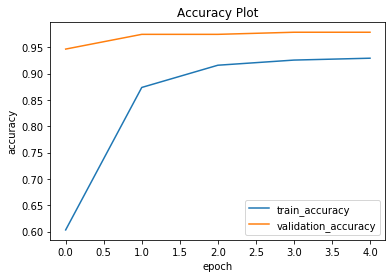

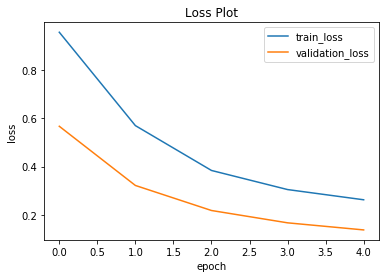

In [12]:
plot_accuracy(history,'Accuracy Plot')
plot_loss(history,'Loss Plot')

The graph above plotted are for the accuray and loss at each epoch. I could finally achieve my desired goal of an accuray for the validation samples above 90% and the loss to be very low. As the number of epochs increased the loss further reduces and accuracy kept on increasing. But I obsereved that after 5 epochs, the increase in accuracy or the decrease in loss was not that significatnt. That is the reason why I chose the number of epochs to be 5.

In [8]:
%%time
K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

CPU times: user 7.92 s, sys: 300 ms, total: 8.22 s
Wall time: 8.21 s


Now I must show you the predictions made by my model for some random images downloaded form internet. So I am loading my model as model_best after I have trained it.

In [9]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

Here I am defining a predict_class fuction to use my model and predic the class of the image when i pass through it.

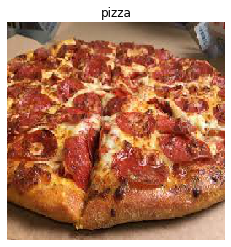

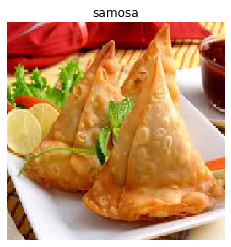

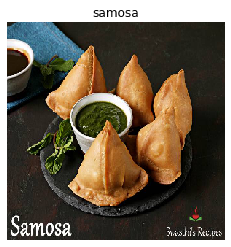

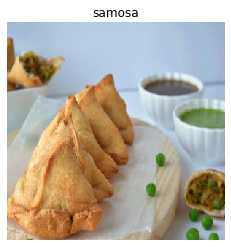

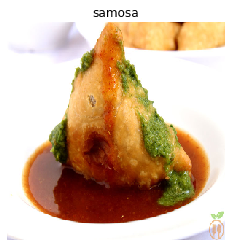

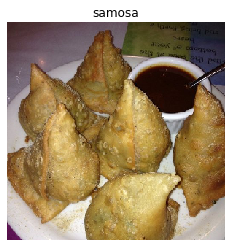

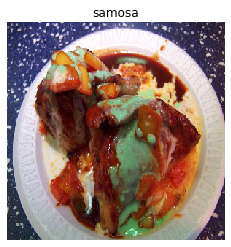

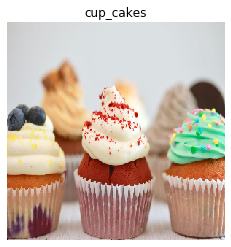

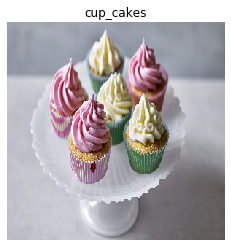

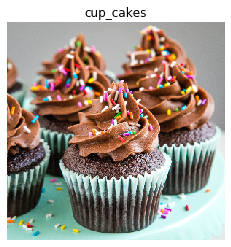

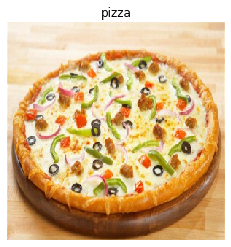

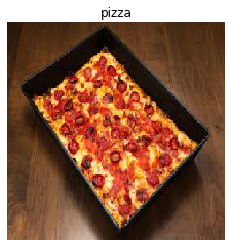

In [14]:
images = []
images.append('pizza.jpeg')
images.append('samosa.jpeg')
images.append('samosa2.jpg')
images.append('samosa3.jpg')
images.append('samosa4.jpg')
images.append('samosa6.jpg')
images.append('298856.jpg')
images.append('cupcake.jpg')
images.append('test1.jpg')
images.append('test2.jpg')
images.append('test3.jpg')
images.append('test4.jpeg')
predict_class(model_best, images, True)

Sir, there are some of the random images that I have downloaded from the internet and the perdictions of each image is diplayed on its top.

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

The following is the summary of my convolutional neural network architecture. It contains the information of all the neural layers and where does the output of each layer go. There were a total of 22,065,443 parameters out of which there were 22,031,011 trainablle parameters. As you can see sir, there were huge number of parametrers and I have never worked with training of so many parameters. It was a big challenge for me and to achieve this accuracy had taken alot of trials. Training my model again and again for hours.

Sir, I have been able to achieve an accuracy about 90% with numerous hit and trials. This architecture it sufficient enough to be applied to ever larger number of classes and would give accurate results.

*********************************************************************************************************************

Untill now I had been able to classify my food item correctly.

Sir, further I have tried something to calculate the calorie content in my food, but I was not successful in doing so.

My approach to estimate the calorie content was to use a plate as a reference object for the estimation of the food detected in images. As the same food can be taken at different depths to generate different picture sizes I need a method to calculate calorie or estimate the size of the food in a real-world scenario. After I get the desired food items detected along with their masks, I need the real object sizes, which is not possible through a pin-hole camera images alone. So, I should take a referencing approach that references the food-objects to the size of the pre-known object to extract the actual size of the food contained in that specific image. Plates can be detected using edge detection or include in training data to detect along with foods with a single network. After I detect the plates, the pixels_per_inch_sq is calculated using the actual size of the plate in real life.

pixels_per_inch_sq= plate_pixels_area / actual_plate_area

real_food_area = masked_food_pixel_area / pixels_per_inch_sq